# Preprocemento - Dataset 1

## Imports

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
import random

## Setting random seeds

Força inicialização das tabelas pseudo aleatórias a fim de se ter repetibilidade nos tests

In [2]:
np.random.seed(1)
random.seed(1)

## Leitura dos dados e armazenamento em DataFrame Pandas

In [2]:
dataPath = r'D:\14--OneDrive\OneDrive\ML-SEA-2021\Rede_Teste_2' # modificar este caminho para o local dos dados no seu computador
npzFname = 'dataset_v1_lhs1000_sw_ar.npz'

npz = np.load(os.path.join(dataPath, npzFname))

In [5]:
npz['columns']

array(['sw', 'ar', 'sweep', 'static_thrust', 'climb_cas', 'climb_mach',
       'cruise_mach', 'cruise_alt', 'mission_dist', 'tow', 'bow',
       'w_fuel', 'd_mission', 't_mission', 'actual_cruise_alt'],
      dtype='<U17')

### Conversão para DataFrame e overview do resultado

In [6]:
df = pd.DataFrame(npz['data'], columns=npz['columns'])
df

,sw,ar,sweep,static_thrust,climb_cas,climb_mach,cruise_mach,cruise_alt,mission_dist,tow,bow,w_fuel,d_mission,t_mission,actual_cruise_alt
0,186.706425,7.018758,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,102802.514008,51804.883466,27016.710450,2000.564005,266.091132,30000.0
1,179.168747,13.208006,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,96416.320220,52941.241191,19508.492083,2002.965022,265.912557,30000.0
2,124.388366,12.311823,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,90075.218293,51300.794817,14792.458241,2002.378584,265.637597,30000.0
3,103.742971,12.325404,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,88937.950310,50754.583475,14202.296172,2002.397955,265.640858,30000.0
4,104.757170,9.920992,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,90034.909365,50488.509865,15583.172871,2002.876260,265.810799,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,102.642208,12.284328,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,88910.421265,50720.451519,14209.327810,2002.410929,265.645836,30000.0
996,125.787540,13.909113,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,89904.725258,51571.645887,14346.139136,2002.236822,265.586011,30000.0
997,99.942461,11.034167,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,89305.331055,50503.553604,14829.827686,2002.655070,265.735071,30000.0
998,152.282747,9.547638,25.0,25000.0,250.0,0.6,0.8,30000.0,2000.0,93724.899818,51551.343512,18217.875996,2003.084133,265.900891,30000.0


### Gráfico com visualização 3D da saída versus as duas principais entradas

<AxesSubplot:xlabel='sw', ylabel='ar'>

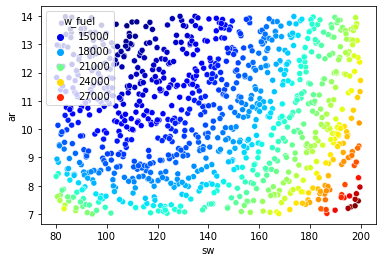

In [5]:
cmap = mpl.cm.get_cmap('jet')
sns.scatterplot(data=df, x="sw", y="ar", hue='w_fuel', palette=cmap)

## Tratamento dos dados

### Remoção de NaN's

In [6]:
df.dropna(axis='rows', inplace=True)
len(df)

1000

### Remoção de outliers

<AxesSubplot:xlabel='sw', ylabel='w_fuel'>

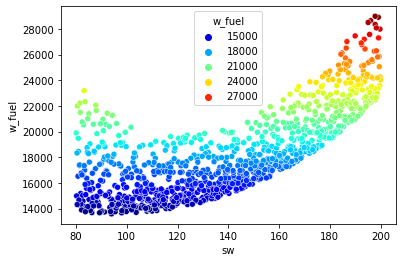

In [7]:
sns.scatterplot(data=df, x="sw", y='w_fuel', hue='w_fuel', palette=cmap)

#### Clustering utilizando Gaussian Mixture Model

In [12]:
gmm = mixture.GaussianMixture(n_components=12)

gmm_data = df.loc[:,['sw','w_fuel']].values

gd_max = np.max(gmm_data, axis=0)
gd_min = np.min(gmm_data, axis=0)
gd_scale = gd_max - gd_min
gmm_data = (gmm_data - gd_min) * (1 / gd_scale)

gmm.fit(gmm_data)

y_pred = gmm.predict(gmm_data)

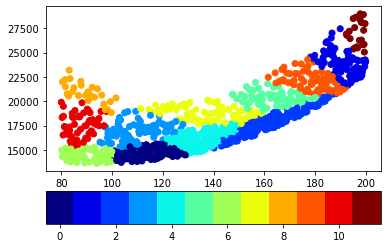

In [16]:
fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios':[5,1]})
_ = ax[0].scatter(df.loc[:,'sw'].values, df.loc[:, 'w_fuel'], c=y_pred, cmap='jet')

mpl.colorbar.ColorbarBase(ax=ax[1], cmap=mpl.cm.get_cmap('jet'), values=np.sort(np.unique(y_pred)),
                                 orientation="horizontal")

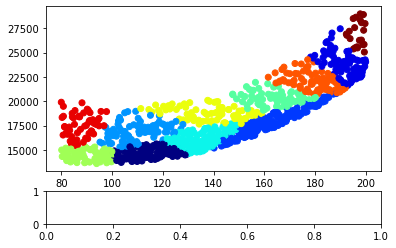

In [21]:
df['GMM_pred'] = y_pred
df_clean = df.loc[y_pred!=8,:]
fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios':[5,1]})
_ = ax[0].scatter(df_clean.loc[:,'sw'].values, df_clean.loc[:, 'w_fuel'], c=df_clean.loc[:, 'GMM_pred'], cmap='jet')

In [24]:
df_clean = df

#### Remoção de outliers utilizando Gaussian Mixture Model

In [25]:
gmm = mixture.GaussianMixture(
        n_components=8, covariance_type='full')
gmm_data = df_clean.loc[:,['sw','w_fuel']].values

gd_max = np.max(gmm_data, axis=0)
gd_min = np.min(gmm_data, axis=0)
gd_scale = gd_max - gd_min
gmm_data = (gmm_data - gd_min) * (1 / gd_scale)
gmm.fit(gmm_data)
y_pred = gmm.predict(gmm_data)

y_score = gmm.score_samples(gmm_data)

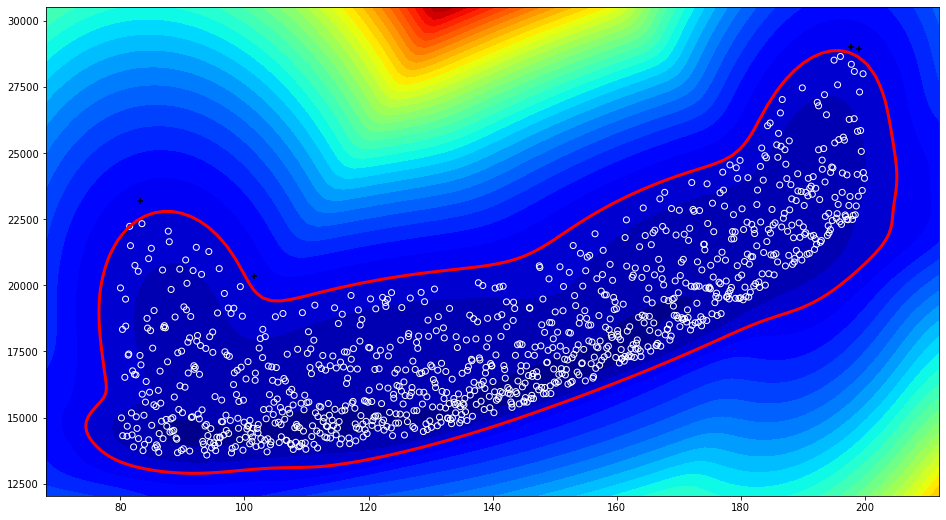

In [26]:
y_threshold = np.percentile(y_score, 0.5)

df_clean2 = df_clean.loc[y_score >= y_threshold]

df_outlier = df_clean.loc[y_score < y_threshold]


X, Y = np.meshgrid(np.linspace(-0.1,1.1,num=100), np.linspace(-0.1,1.1,num=100))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)

Z = Z.reshape((100,100))

X = X * gd_scale[0] + gd_min[0]
Y = Y * gd_scale[1] + gd_min[1]

fig, ax = plt.subplots(figsize=(16,9))

ax.contourf(X, Y,Z, cmap='jet_r', levels=45)

ax.scatter(df_outlier.loc[:,'sw'].values, df_outlier.loc[:, 'w_fuel'], color='k', facecolor='k', marker='+')

ax.scatter(df_clean2.loc[:,'sw'].values, df_clean2.loc[:, 'w_fuel'], color='white', facecolor='None', marker='o')

ax.contour(X, Y,Z, colors='r', levels=[y_threshold], linestyles='-', linewidths=3.0)

<AxesSubplot:xlabel='sw', ylabel='w_fuel'>

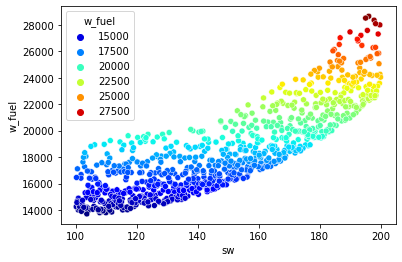

In [13]:
df_constr = df_clean2.loc[df_clean.loc[:,'sw']>100,:]
sns.scatterplot(data=df_constr, x="sw", y='w_fuel', hue='w_fuel', palette=cmap)

<AxesSubplot:xlabel='sw', ylabel='ar'>

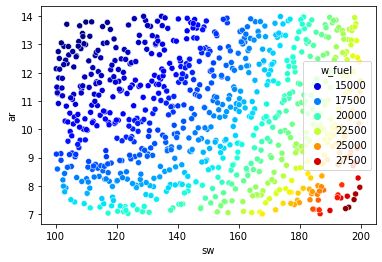

In [14]:
sns.scatterplot(data=df_constr, x="sw", y="ar", hue='w_fuel', palette=cmap)

## Seleção das features, labels e segmentação do dataset

In [15]:
features = ['sw', 'ar']
labels = ['w_fuel']

X_ALL = df_clean2.loc[:, features].values
Y_ALL = df_clean2.loc[:, labels].values

m_avail = X_ALL.shape[0]
print('Available number of samples: {}'.format(m_avail))

m_test = 50
m_train = X_ALL.shape[0] - m_test

idxs = np.arange(m_avail)
np.random.shuffle(idxs)

X_ALL = X_ALL[idxs, :]
Y_ALL = Y_ALL[idxs, :]

X_TRAIN = X_ALL[:m_train, :]
Y_TRAIN = Y_ALL[:m_train, :]

X_TEST = X_ALL[:m_train, :]
Y_TEST = Y_ALL[:m_train, :]

np.savez(os.path.join(dataPath, 'training_data_sw_ar_clean.npz'),
         X_TRAIN=X_TRAIN, Y_TRAIN=Y_TRAIN, X_TEST=X_TEST, Y_TEST=Y_TEST)

Available number of samples: 973


In [16]:
features = ['sw', 'ar']
labels = ['w_fuel']

X_ALL = df.loc[:, features].values
Y_ALL = df.loc[:, labels].values

m_avail = X_ALL.shape[0]
print('Available number of samples: {}'.format(m_avail))

m_test = 50
m_train = X_ALL.shape[0] - m_test

idxs = np.arange(m_avail)
np.random.shuffle(idxs)

X_ALL = X_ALL[idxs, :]
Y_ALL = Y_ALL[idxs, :]

X_TRAIN = X_ALL[:m_train, :]
Y_TRAIN = Y_ALL[:m_train, :]

X_TEST = X_ALL[:m_train, :]
Y_TEST = Y_ALL[:m_train, :]

np.savez(os.path.join(dataPath, 'training_data_sw_ar_raw.npz'), X_TRAIN=X_TRAIN, Y_TRAIN=Y_TRAIN, X_TEST=X_TEST, Y_TEST=Y_TEST)

Available number of samples: 1000
